In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Import 1994 adult.csv file from below source

Data from: https://www.kaggle.com/datasets/uciml/adult-census-income

In [2]:
dfadult = pd.read_csv('/Users/jaseng/Documents/summer24_patina_project/patinaproject1/adult.csv')
dfadult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Data Cleaning 

In [3]:
dfadult.shape
#dfadult.info

(32561, 15)

In [4]:
dfadult[dfadult == '?'] = np.nan

In [5]:
dfadult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
for col in ['workclass', 'occupation', 'native.country']:
    dfadult[col].fillna(dfadult[col].mode()[0], inplace=True)
    
dfadult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Summary Statistics 
(note that this is both all of the data & only asians, must run other code before aanhpi summary)

In [7]:
adult_summary = dfadult.describe()
print(adult_summary)

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [78]:
aanhpi_summary= dfaanhpi.describe()
print(aanhpi_summary)

               age         fnlwgt  education.num  capital.gain  capital.loss  \
count  1039.000000    1039.000000    1039.000000   1039.000000   1039.000000   
mean     37.746872  159940.609240      10.960539   1478.358037     97.222329   
std      12.825133   85122.307505       2.811582   9986.156906    423.556931   
min      17.000000   14878.000000       1.000000      0.000000      0.000000   
25%      28.000000   93321.000000       9.000000      0.000000      0.000000   
50%      36.000000  143098.000000      10.000000      0.000000      0.000000   
75%      45.000000  194456.000000      13.000000      0.000000      0.000000   
max      90.000000  506329.000000      16.000000  99999.000000   2457.000000   

       hours.per.week       income  
count     1039.000000  1039.000000  
mean        40.127045     0.265640  
std         12.556816     0.441886  
min          1.000000     0.000000  
25%         40.000000     0.000000  
50%         40.000000     0.000000  
75%         40.00000

### Visualizations

#### comparing percentage of above and below 50k

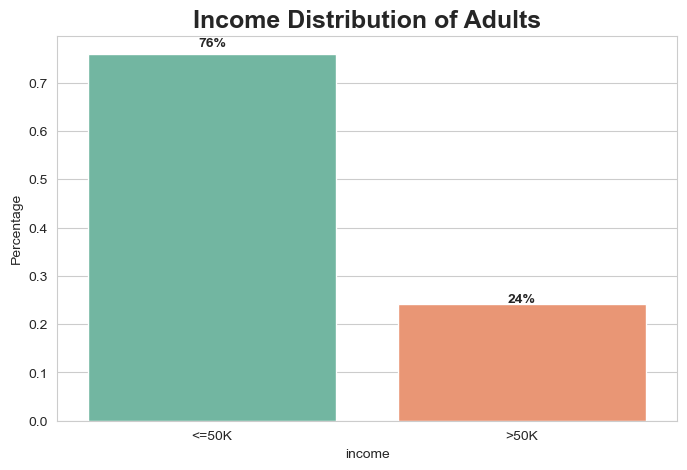

In [161]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')

# Calculate percentage of each income category
eda_percentage = dfadult['income'].value_counts(normalize=True).rename_axis('income').reset_index(name='Percentage')


# Create the bar plot with custom palette
ax = sns.barplot(x='income', y='Percentage', data=eda_percentage.head(10), palette='Set2')

# Annotate each bar with percentage values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.show()


#### comparing based on age group

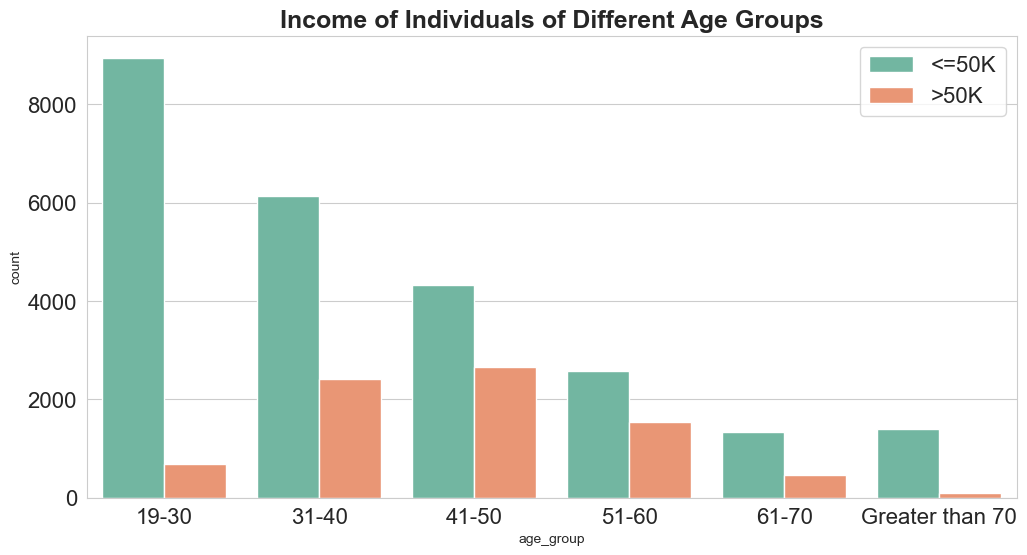

In [162]:
# Define the age_group function
def age_group(x):
    x = int(x)
    x = abs(x)
    if 18 < x < 31:
        return "19-30"
    elif 30 < x < 41:
        return "31-40"
    elif 40 < x < 51:
        return "41-50"
    elif 50 < x < 61:
        return "51-60"
    elif 60 < x < 71:
        return "61-70"
    else:
        return "Greater than 70"

# Assuming dfadult is defined correctly and contains 'age' column
# Apply the age_group function to create 'age_group' column
dfadult['age_group'] = dfadult['age'].apply(age_group)

# Define order of age groups for plotting
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

# Plotting with Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='income', data=dfadult, palette='Set2', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()


#### comparing based on working class

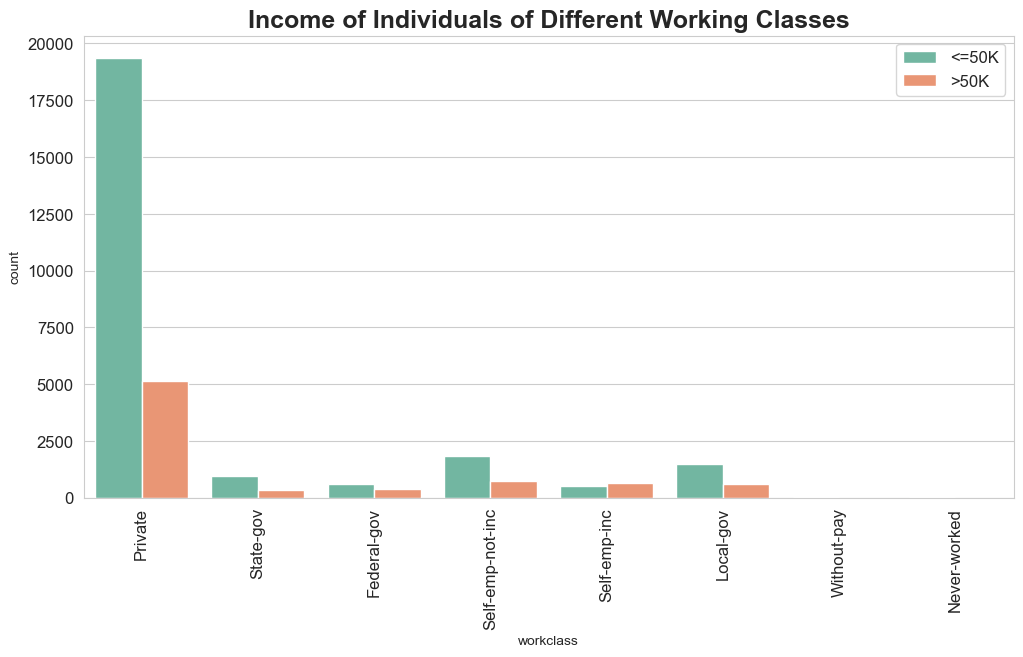

In [163]:
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=dfadult, palette='Set2')

plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

#### seperating different educations and evaluating working class distribution

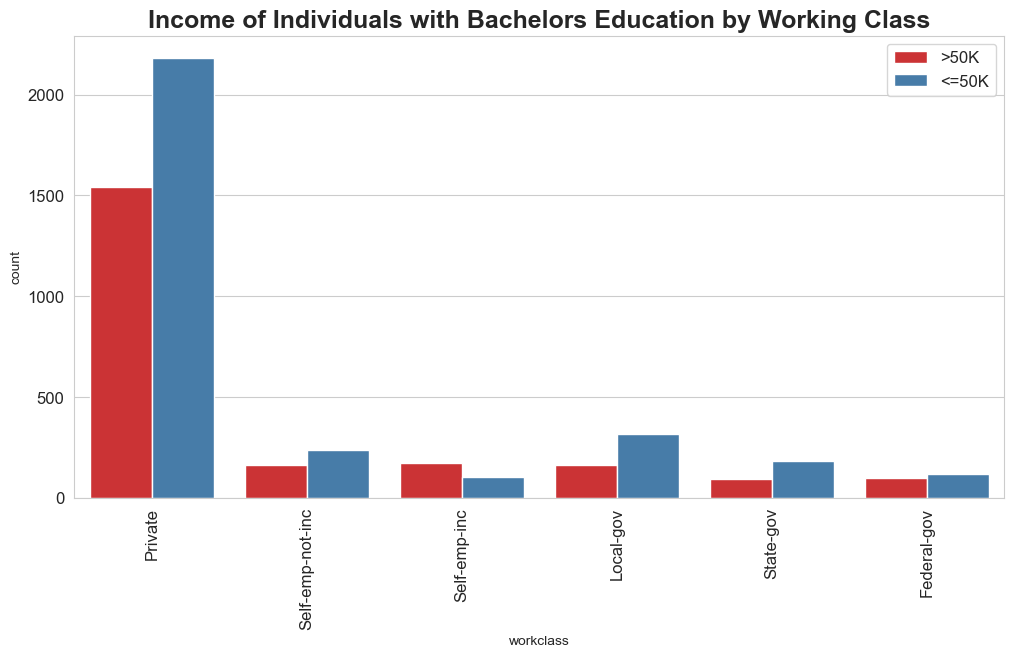

In [178]:
# Filter the DataFrame where education is 'Bachelors'
filtered_data = dfadult[dfadult['education'] == 'Bachelors']

plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=filtered_data, palette='Set1')

plt.title('Income of Individuals with Bachelors Education by Working Class', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


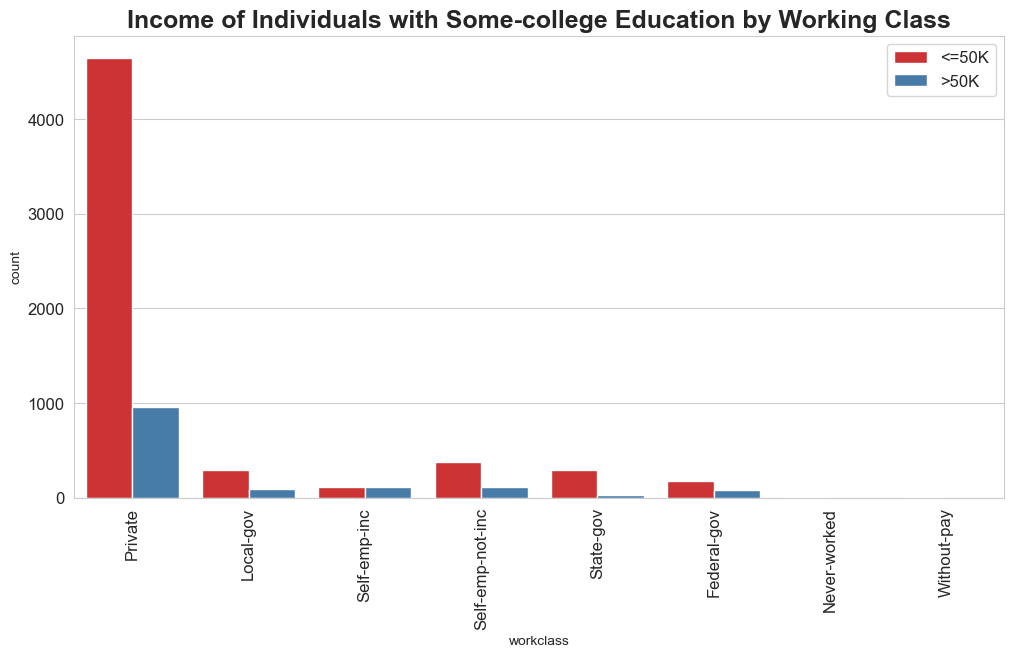

In [177]:
# Filter the DataFrame where education is 'Some-college'
filtered_data = dfadult[dfadult['education'] == 'Some-college']

plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=filtered_data, palette='Set1')

plt.title('Income of Individuals with Some-college Education by Working Class', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


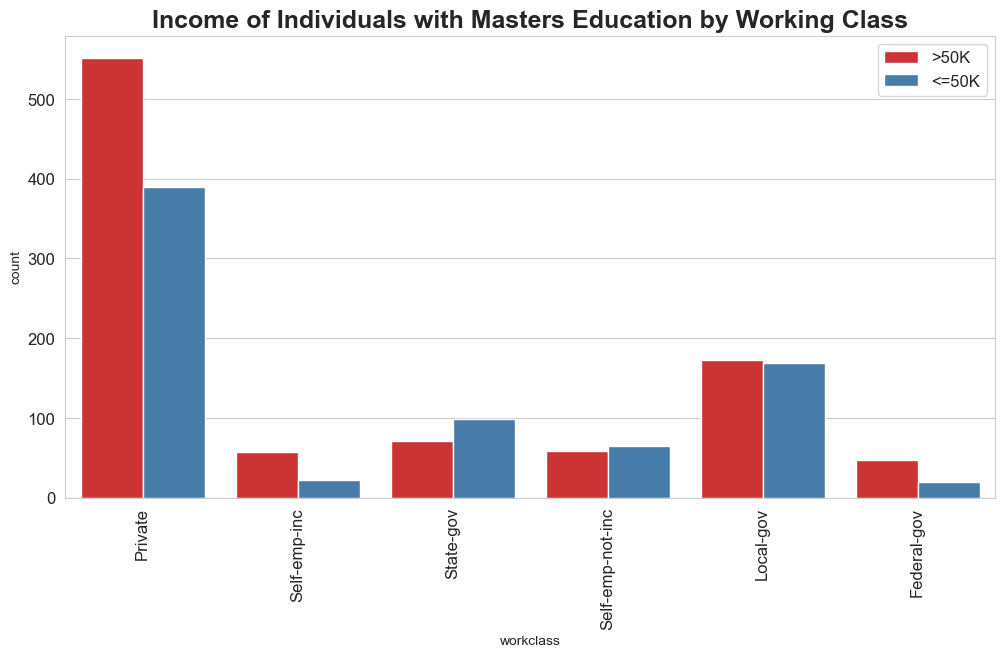

In [175]:
# Filter the DataFrame where education is 'Masters'
filtered_data = dfadult[dfadult['education'] == 'Masters']

plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=filtered_data, palette='Set1')

plt.title('Income of Individuals with Masters Education by Working Class', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


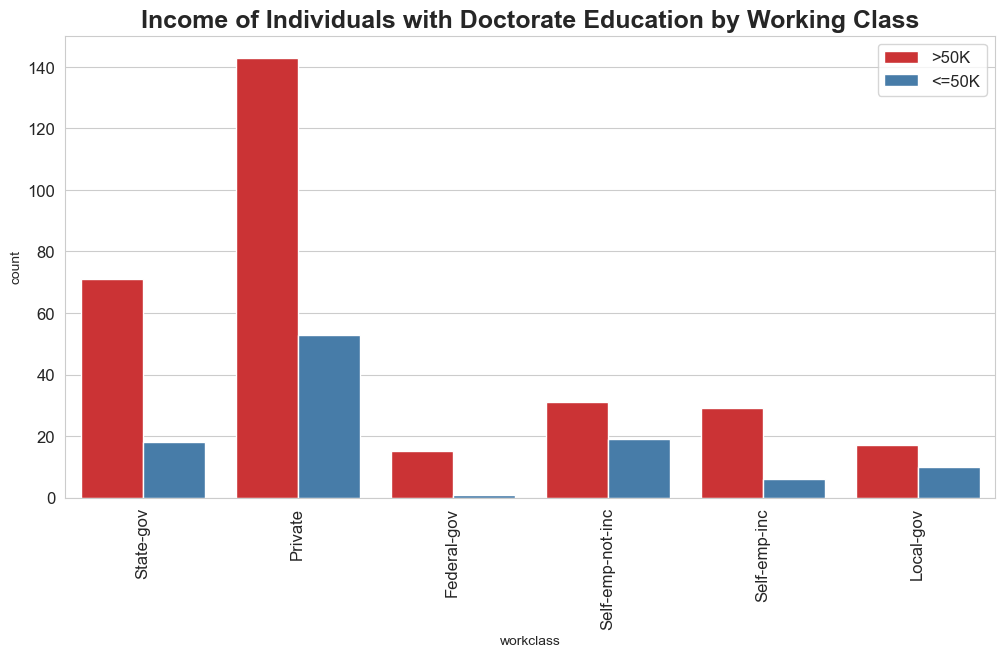

In [179]:
# Filter the DataFrame where education is 'Doctorate'
filtered_data = dfadult[dfadult['education'] == 'Doctorate']

plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=filtered_data, palette='Set1')

plt.title('Income of Individuals with Doctorate Education by Working Class', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


#### comparing based on education level

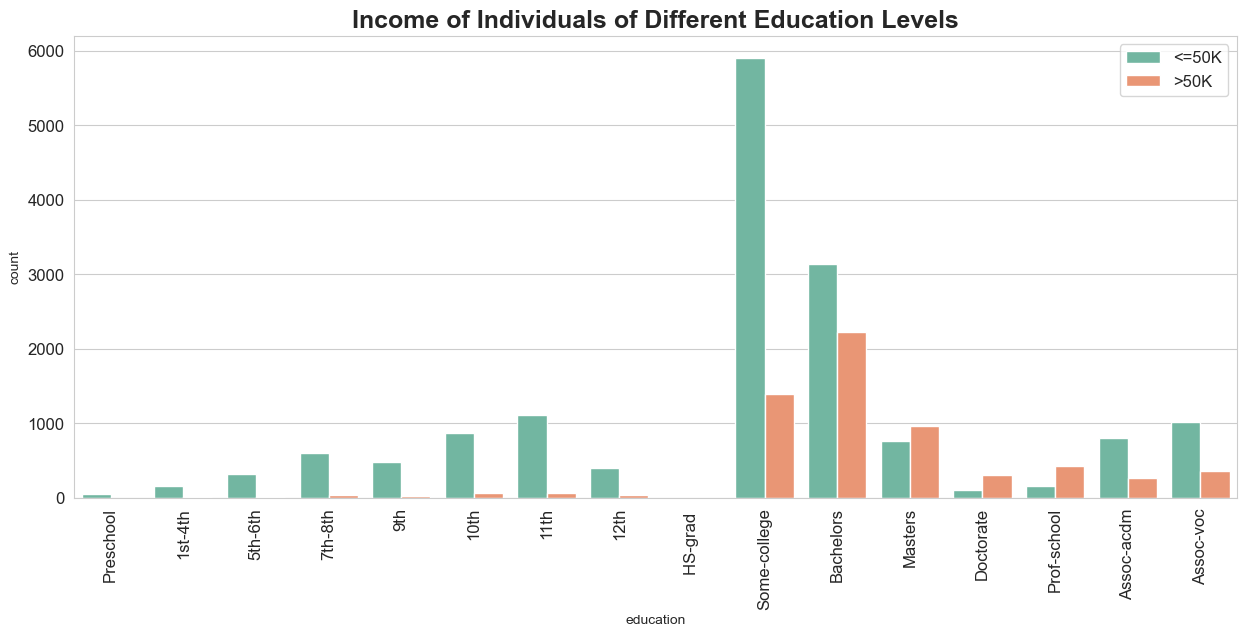

In [166]:
plt.figure(figsize=(15, 6))

order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
              'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']

sns.countplot(x='education', hue='income', data=dfadult, palette='Set2', order=order_list)

plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

#### comparing based on marital status

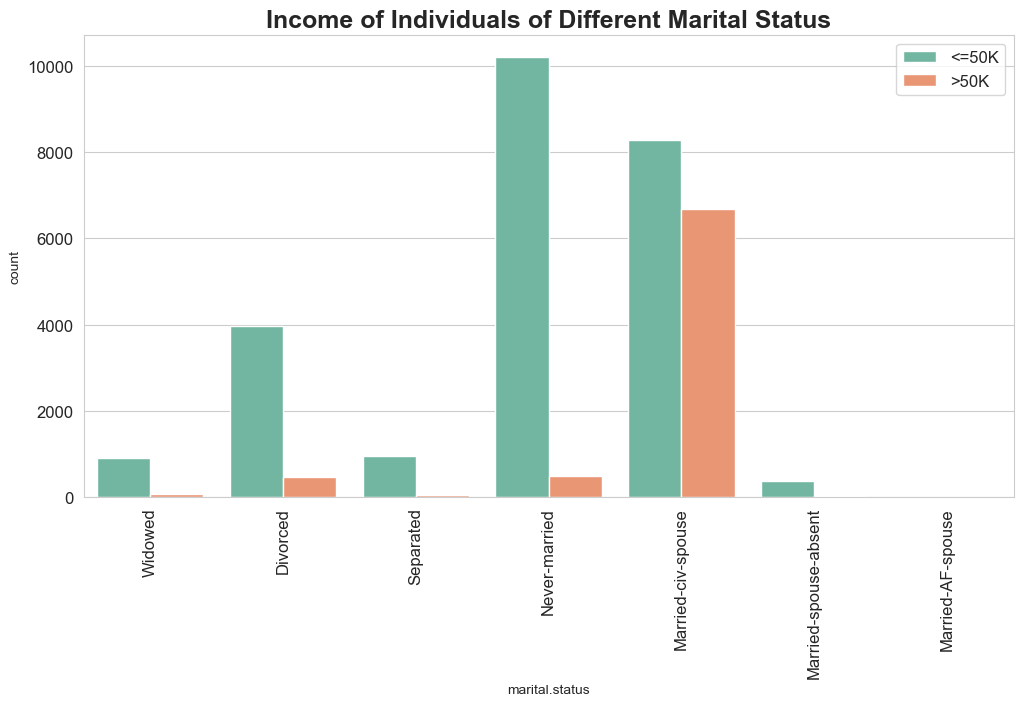

In [53]:
plt.figure(figsize=(12, 6))

sns.countplot(x='marital.status', hue='income', data=dfadult, palette='Set2')

plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


#### comparing based on occupation

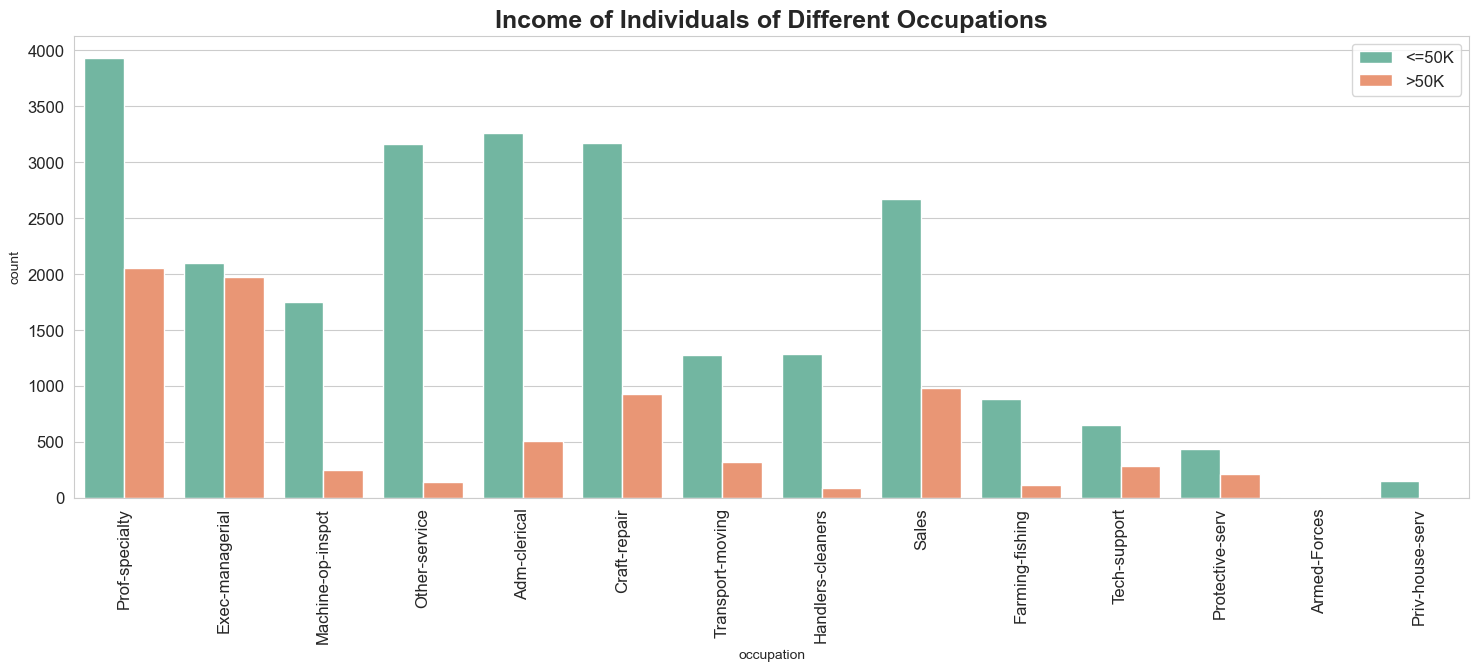

In [168]:
plt.figure(figsize=(18, 6))

sns.countplot(x='occupation', hue='income', data=dfadult, palette='Set2')

plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


#### comparing based on relationship status (similar to marital status)

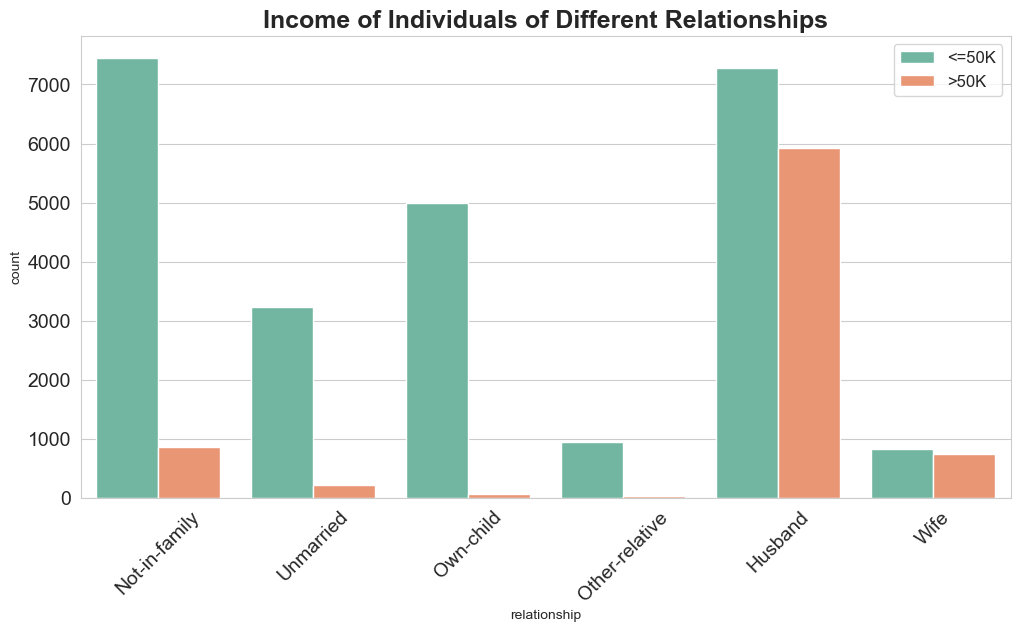

In [169]:
plt.figure(figsize=(12, 6))

sns.countplot(x='relationship', hue='income', data=dfadult, palette='Set2')

plt.title('Income of Individuals of Different Relationships', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

plt.show()


#### comparing based on gender

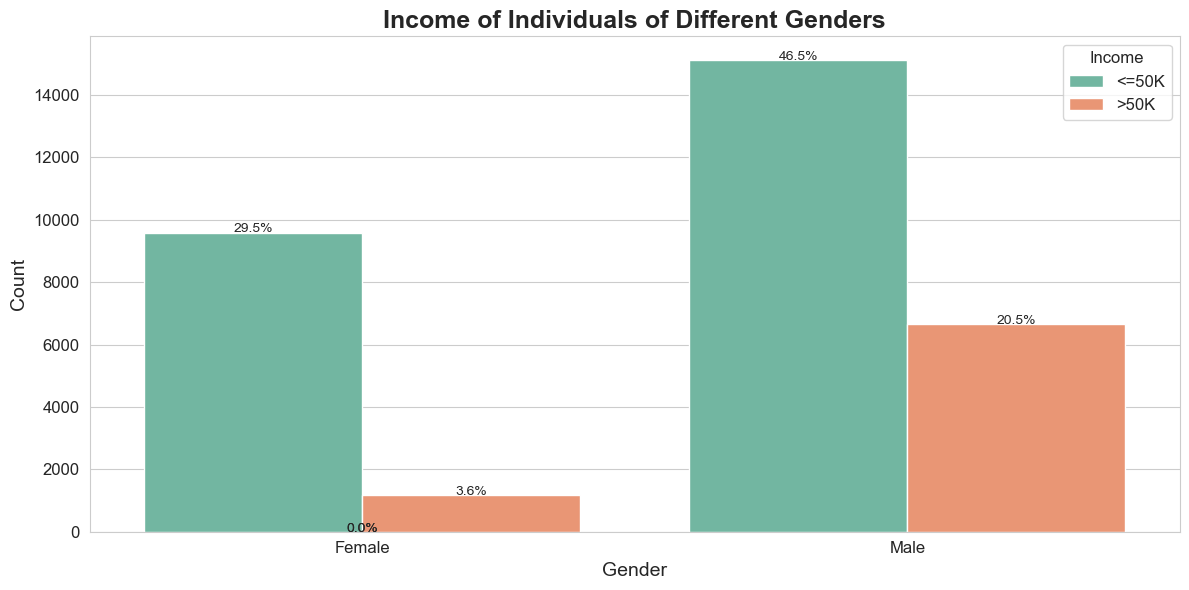

In [57]:
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(x='sex', hue='income', data=dfadult, palette='Set2')

plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Income', title_fontsize='large', fontsize='large')

# Calculate percentages
total = len(dfadult)  # Total number of records in the DataFrame
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Add a small vertical offset
            f'{height / total:.1%}',  # Calculate percentage and format
            ha='center', fontsize=10)

plt.tight_layout()  # Ensure all annotations are visible
plt.show()


In [58]:
dfadult['income']=dfadult['income'].map({'<=50K': 0, '>50K': 1})

### Correlation Analysis

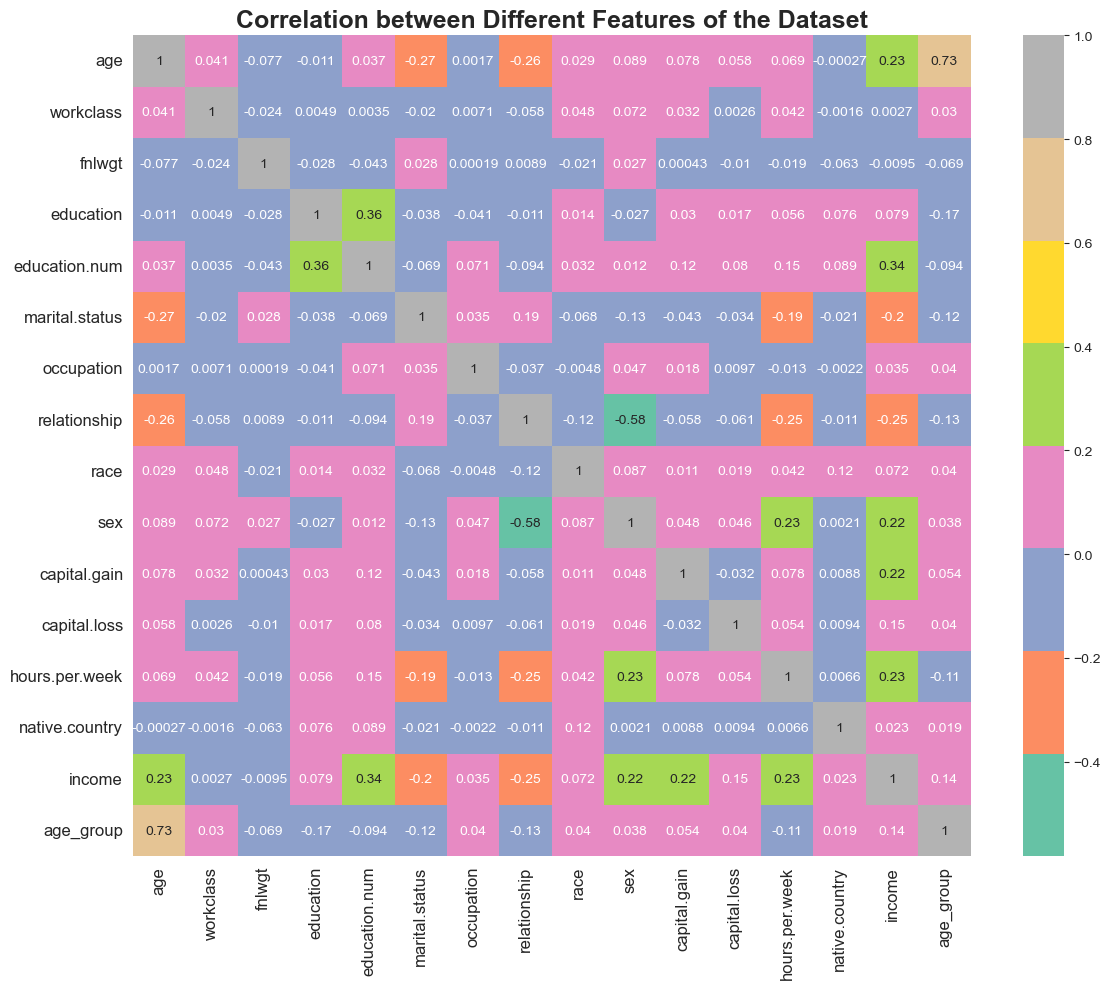

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
dfadult_encoded = dfadult.copy()

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in dfadult_encoded.columns:
    if dfadult_encoded[col].dtype == 'object':
        dfadult_encoded[col] = label_encoder.fit_transform(dfadult_encoded[col])

# Compute the correlation matrix
corr = dfadult_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='Set2', annot=True)

plt.title("Correlation between Different Features of the Dataset", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Filtering where race is Asian Pacific Islander

In [60]:
dfaanhpi = dfadult[dfadult['race'] == 'Asian-Pac-Islander']

# Print the filtered DataFrame
dfaanhpi.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group
47,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Vietnam,0,Greater than 70
63,51,Self-emp-not-inc,160724,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,2415,40,China,1,51-60
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,United-States,1,41-50
90,39,Private,198654,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,67,India,1,31-40
95,46,Private,192963,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,2415,35,Philippines,1,41-50


### Correlation analysis with new data

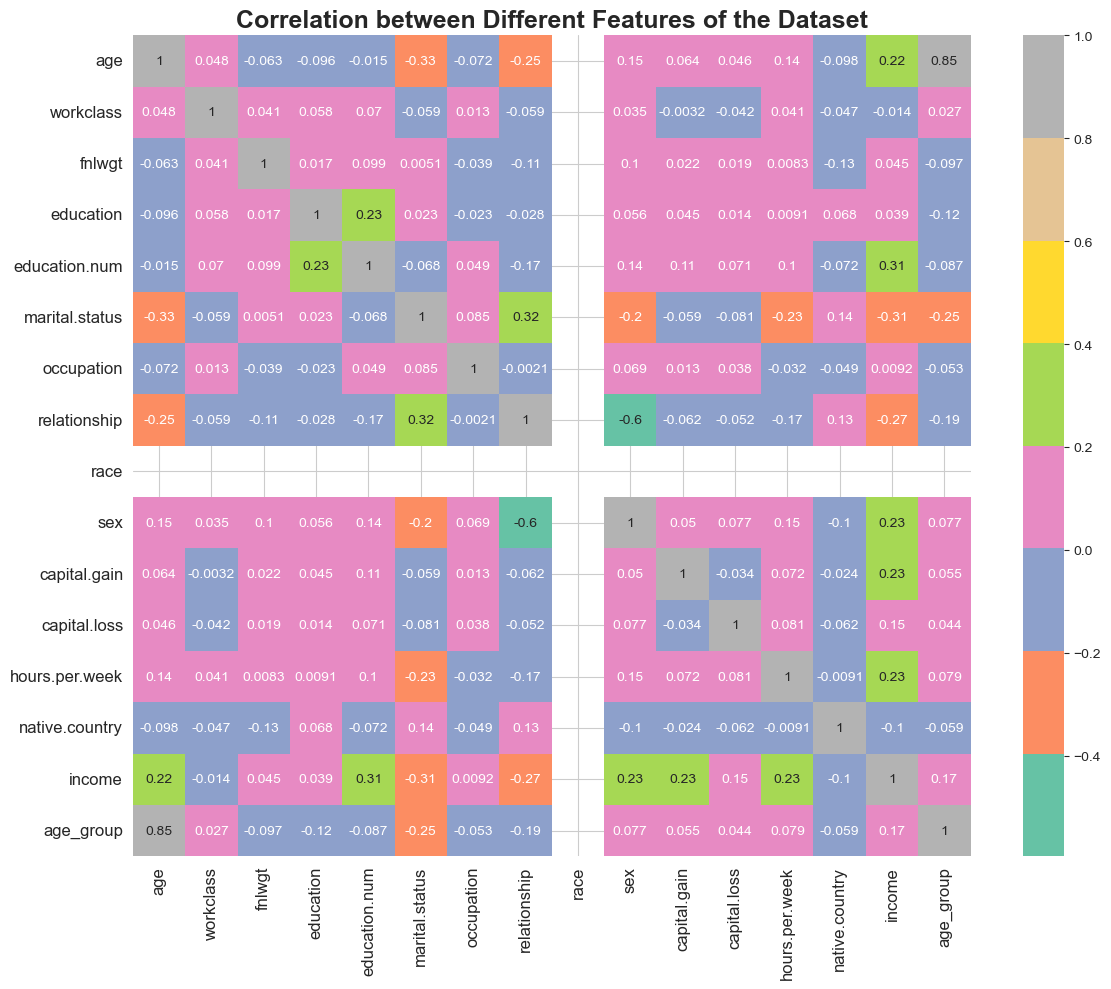

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
dfaanhpi_encoded = dfaanhpi.copy()

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in dfaanhpi_encoded.columns:
    if dfaanhpi_encoded[col].dtype == 'object':
        dfaanhpi_encoded[col] = label_encoder.fit_transform(dfaanhpi_encoded[col])

# Compute the correlation matrix
corr = dfaanhpi_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='Set2', annot=True)

plt.title("Correlation between Different Features of the Dataset", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### to do week of july 1

-	Different types of graphs
-	Markdowns
-	Comparing against Asian Americans
-	Think about how to compare with 2017 daset


- look at native country - more races? --> percentage of asians per state

Retirement age (https://www.cnbc.com/select/americans-are-retiring-later-than-they-did-in-the-1990s/#:~:text=According%20to%20a%20new%20Gallup,to%20age%2061%20in%202022.) 
- interesting article on retirement vs gender, education
- 2024: average retirement age is around 62-63 yo
- 1994: average retirement age was around 57 yo

What did 50k in 1994 mean
- 50,000 in 1994 is equivalent to $105,194.10 today
  
- 50,000 is equivalent to $82,699.06 in 2017

Potential source for future consideration: https://www.kaggle.com/datasets/zusmani/us-census-2020?select=New_York_NY.csv (401 columns, one file for each state)

### 2017 Data

In [8]:
dfadult2017 = pd.read_csv('/Users/jaseng/summer24/projectonedata/acs2017_county_data.csv')
dfadult2017.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [9]:
dfadult2017.shape

(3220, 37)

In [10]:
dfadult2017.isnull().sum()

CountyId            0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        1
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [11]:
dfadult2017['ChildPoverty'].fillna(dfadult2017['ChildPoverty'].mode()[0], inplace=True)
    
# dfadult2017.isnull().sum()

In [12]:
dfadult2017_summary= dfadult2017.describe()
print(dfadult2017_summary)

           CountyId      TotalPop           Men         Women     Hispanic  \
count   3220.000000  3.220000e+03  3.220000e+03  3.220000e+03  3220.000000   
mean   31393.605280  1.007681e+05  4.958781e+04  5.118032e+04    11.296584   
std    16292.078954  3.244996e+05  1.593212e+05  1.652164e+05    19.342522   
min     1001.000000  7.400000e+01  3.900000e+01  3.500000e+01     0.000000   
25%    19032.500000  1.121350e+04  5.645500e+03  5.553500e+03     2.100000   
50%    30024.000000  2.584750e+04  1.287900e+04  1.299350e+04     4.100000   
75%    46105.500000  6.660825e+04  3.301725e+04  3.359375e+04    10.000000   
max    72153.000000  1.010572e+07  4.979641e+06  5.126081e+06   100.000000   

             White        Black       Native        Asian      Pacific  ...  \
count  3220.000000  3220.000000  3220.000000  3220.000000  3220.000000  ...   
mean     74.920186     8.681957     1.768416     1.289379     0.083416  ...   
std      23.056700    14.333571     7.422946     2.716191   

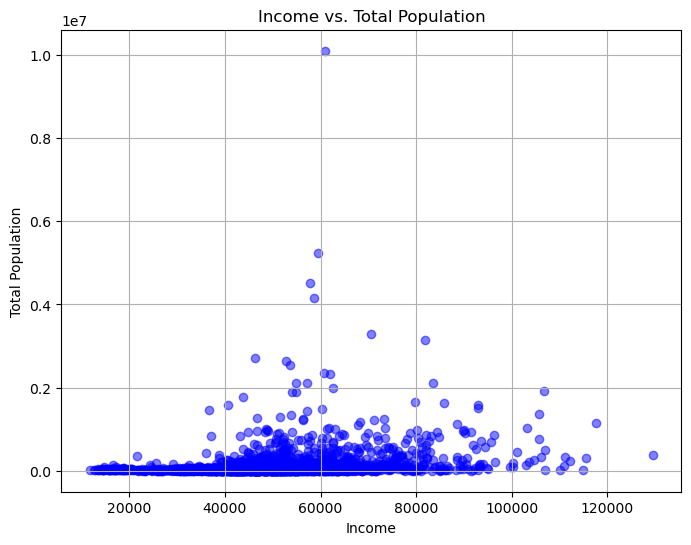

In [15]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
x = dfadult2017['Income']
y = dfadult2017['Countyid']

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(x, y, color='blue', alpha=0.5)  # Plot scatter plot with specified color and transparency
plt.title('Income vs. Total Population')
plt.xlabel('Income')
plt.ylabel('Total Population')

# Optionally, you can add grid lines
plt.grid(True)

plt.show()


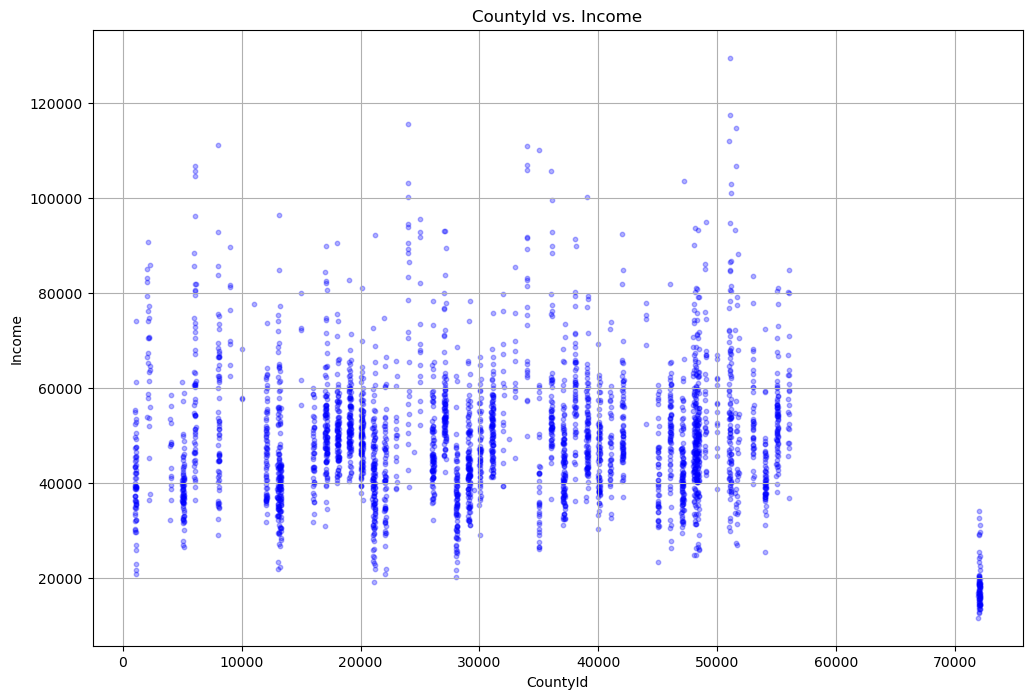

In [18]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
x = dfadult2017['CountyId']  # CountyId on the x-axis
y = dfadult2017['Income']    # Income on the y-axis

plt.figure(figsize=(12, 8))  # Larger figure size (width, height)
plt.scatter(x, y, color='blue', alpha=0.3, s=10)  # Smaller marker size with alpha for transparency
plt.title('CountyId vs. Income')
plt.xlabel('CountyId')
plt.ylabel('Income')

plt.grid(True)  # Add grid lines for better readability

plt.show()


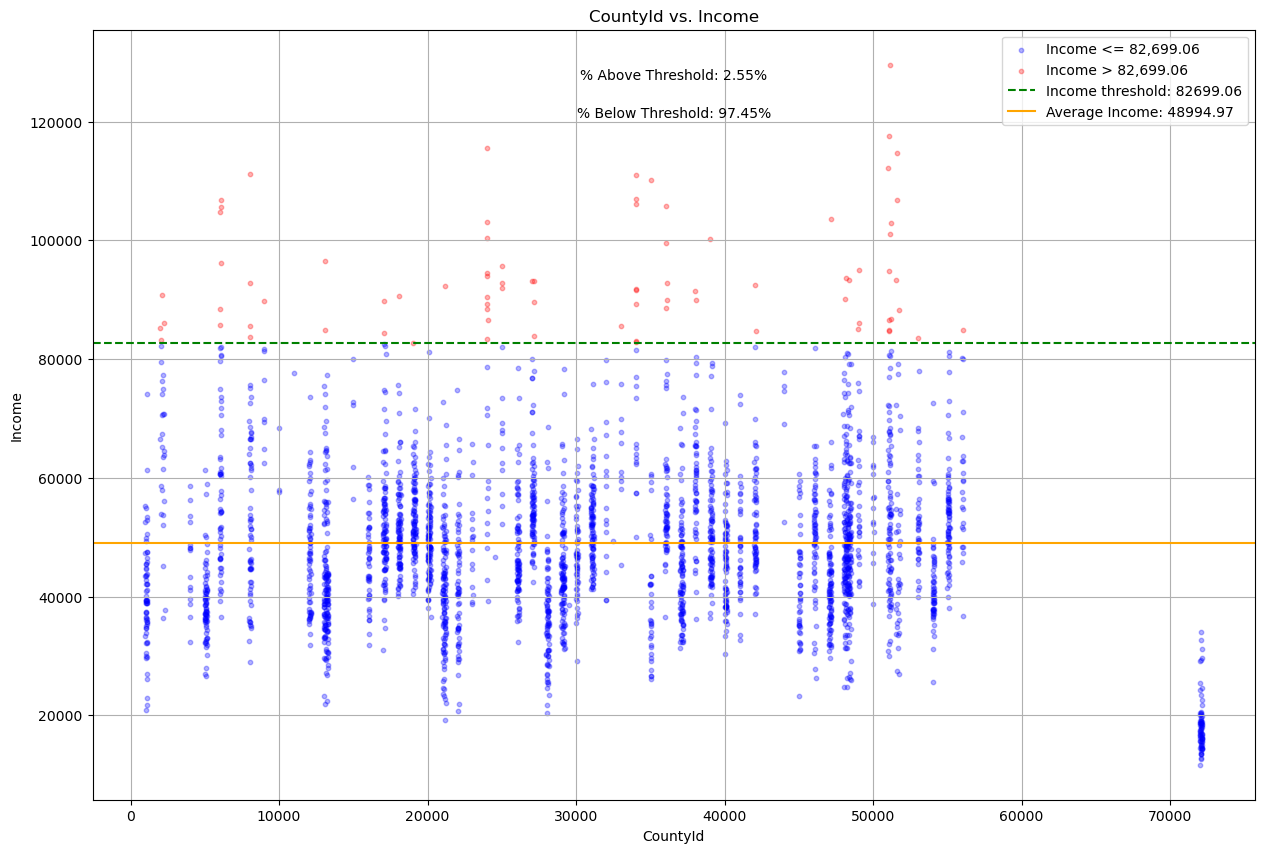

In [21]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
x = dfadult2017['CountyId']  # CountyId on the x-axis
y = dfadult2017['Income']    # Income on the y-axis

# Define the income threshold
income_threshold = 82699.06

# Calculate percentage of points above and below the threshold
above_threshold = dfadult2017[dfadult2017['Income'] > income_threshold]
below_threshold = dfadult2017[dfadult2017['Income'] <= income_threshold]

percentage_above = len(above_threshold) / len(dfadult2017) * 100
percentage_below = len(below_threshold) / len(dfadult2017) * 100

# Calculate average income
average_income = dfadult2017['Income'].mean()

# Plotting
plt.figure(figsize=(15, 10))  # Larger figure size (width, height)

# Plot points below threshold
plt.scatter(x[below_threshold.index], y[below_threshold.index], color='blue', alpha=0.3, s=10, label='Income <= 82,699.06')

# Plot points above threshold
plt.scatter(x[above_threshold.index], y[above_threshold.index], color='red', alpha=0.3, s=10, label='Income > 82,699.06')

# Add vertical line at income threshold
plt.axhline(y=income_threshold, color='green', linestyle='--', label=f'Income threshold: {income_threshold:.2f}')

# Add horizontal line for average income
plt.axhline(y=average_income, color='orange', linestyle='-', label=f'Average Income: {average_income:.2f}')

plt.title('CountyId vs. Income')
plt.xlabel('CountyId')
plt.ylabel('Income')
plt.grid(True)
plt.legend()

# Add text for percentages
plt.text(0.5, 0.95, f'% Above Threshold: {percentage_above:.2f}%', transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='center')
plt.text(0.5, 0.90, f'% Below Threshold: {percentage_below:.2f}%', transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='center')

plt.show()


In [13]:
grouped_data['Income'].mean()

NameError: name 'grouped_data' is not defined

In [190]:
grouped_data['Income'].head()

0    40271.402985
1    66425.448276
2    45816.666667
3    39025.080000
4    61046.758621
Name: Income, dtype: float64

In [132]:
X = dfadult2017.drop(['CountyId', 'County', 'IncomeErr','IncomePerCapErr' ], axis=1)

#y = dfadult2017['income']

In [133]:
X.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,Alabama,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,Alabama,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,Alabama,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,Alabama,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


#### grouping data by state

In [141]:
grouped_data = X.groupby('State').mean()
grouped_data = grouped_data.reset_index()

In [142]:
grouped_data.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,72399.567164,35086.656716,37312.910448,3.298507,65.168657,28.673134,0.607463,0.711940,0.017910,...,1.204478,1.140299,2.528358,26.189552,30679.238806,78.171642,16.049254,5.573134,0.210448,9.023881
1,Alaska,25467.758621,13321.344828,12146.413793,5.093103,48.420690,1.179310,31.627586,5.982759,0.544828,...,24.696552,9.741379,5.455172,11.200000,12208.448276,59.631034,32.834483,7.220690,0.296552,9.655172
2,Arizona,453996.400000,225670.333333,228326.066667,30.886667,50.826667,1.813333,13.233333,1.293333,0.126667,...,3.320000,2.186667,5.033333,21.700000,196926.066667,72.000000,21.846667,5.953333,0.180000,9.766667
3,Arkansas,39705.920000,19488.680000,20217.240000,5.090667,75.634667,16.132000,0.540000,0.692000,0.077333,...,1.970667,1.361333,3.250667,23.013333,17020.480000,75.233333,17.185333,7.376000,0.202667,7.292000
4,California,672118.051724,333906.534483,338211.517241,30.070690,54.762069,2.944828,1.650000,7.070690,0.291379,...,3.336207,2.603448,6.668966,25.527586,310239.913793,71.148276,18.881034,9.567241,0.405172,8.265517


In [143]:
print(grouped_data.columns)

Index(['State', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')


In [145]:
grouped_data['VotingAgeCitizen'].head()

0     54506.179104
1     18294.931034
2    312678.466667
3     29118.600000
4    430519.120690
Name: VotingAgeCitizen, dtype: float64

#### graphing income per cap by state

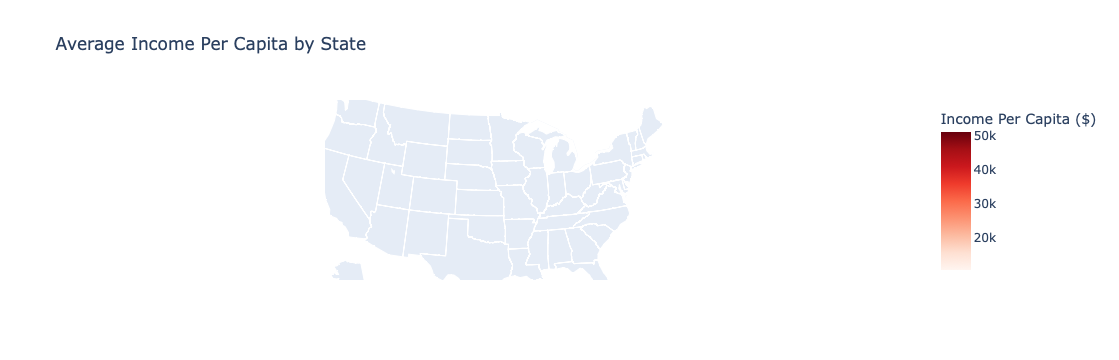

In [129]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have a DataFrame `dfadult2017` with 'State' and 'IncomePerCap' columns
# Example of grouping by State and calculating mean IncomePerCap
grouped_data = dfadult2017.groupby('State')['IncomePerCap'].mean().reset_index()

# Create hover text for each state
grouped_data['text'] = grouped_data['State'] + '<br>' + \
                       'Income Per Capita: $' + grouped_data['IncomePerCap'].astype(str)

# Example GeoJSON URL for US states (basic outline)
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-states.json'

# Create a choropleth map using Plotly
fig = go.Figure(go.Choropleth(
    locations=grouped_data['State'],   # State abbreviations or names
    z=grouped_data['IncomePerCap'],    # Average income per capita
    locationmode='USA-states',         # Location mode for US states
    colorscale='Reds',                 # Color scale
    autocolorscale=False,              # Disable auto color scale
    text=grouped_data['text'],         # Hover text
    marker_line_color='white',         # Marker line color
    colorbar_title="Income Per Capita ($)"  # Color bar title
))

fig.update_layout(
    title_text='Average Income Per Capita by State',  # Title of the map
    geo=dict(
        scope='usa',                    # Map scope (USA states)
        projection=go.layout.geo.Projection(type='albers usa'),  # Projection type
        showlakes=True,                 # Show lakes
        lakecolor='rgb(255, 255, 255)'  # Lake color
    )
)

fig.show()


#### correlation analysis on new dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming grouped_data_encoded is already defined

# Compute the correlation matrix
corr = grouped_data_encoded.corr()

# Plotting the heatmap without numerical annotations
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='Set2', annot=False)

plt.title("Correlation between Different Features of the Dataset", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


NameError: name 'grouped_data_encoded' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded and is named dfadult

# Filter numeric columns
numeric_columns = grouped_data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Compute correlations with 'income'
correlations = grouped_data_encoded[numeric_columns].corrwith(grouped_data_encoded['Income'])

# Create a bar plot of correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')

plt.title('Correlation with Income', fontsize=18, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded and is named dfadult

# Filter numeric columns
numeric_columns = grouped_data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Compute correlations with 'income'
correlations = grouped_data_encoded[numeric_columns].corrwith(grouped_data_encoded['IncomePerCap'])

# Create a bar plot of correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')

plt.title('Correlation with IncomePerCap', fontsize=18, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()